**Identificación:** 1001445953

**Nombre:** Marlon Jhassir García Velásquez

# Problema 1.

Usando el set `PS4_1.csv`, convertir la serie `Date` en el indice (serie de tiempo) y eliminar la serie `Unnamed: 1` (generado por pandas), retornar en una lista y en el siguiente orden:

* cantidad de columnas
* Nombre de las columnas
* número de registros no NaN de cada columna
* cantidad total de memoria usada para cargar el set en el computador ,( df.memory_usage() )
* Estadistica basica para cada columna, media, desviacion estandar, maximo
* Remplazar los NaN por None


# Problema 2

Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019. 


1. Ver la estadistica general del data frame.
2. Dejar las columnas PrimaryType, y Date.
3. Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandaspd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").
4. Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee:
   df.groupby(columna).Date.count()
   
   sort_values()
5. Ordenar los valores por orden alfabetico de Primary type
6. Mostrar de la fila 100 a la 120
6. Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
   ax = sns.barplot(x = "contador", y="Primary Type", data = datos)




# Problema 3

1. Leer el dataset country_vaccinations.csv  y filtrar los datos para Colombia
2. Crear un csv con los datos para colombia
3. Realizar una comparacion con los paises latinoamericanos. 
4. A traves de mascaras determinar el numero de vacunados en el intervalo  [1.5E6, 2.0E6]


LLamamos las librerias que usaremos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns

#Solución Punto 1

In [2]:
df1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTYbHURm55jR6saRnykEx9VStyjuR_cWf6oXtm5QbndYwXcKqqhN3KMYANclJ6liQ/pub?gid=1683399717&single=true&output=csv')
df1.head()

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
0,01/01/2009,0:00,29,20,35,NaN
1,02/01/2009,0:00,19,3,22,NaN
2,03/01/2009,0:00,24,12,22,NaN
3,04/01/2009,0:00,24,8,15,NaN
4,05/01/2009,0:00,120,111,141,NaN


In [3]:
#Cantidad de columnnas
num_columnas = len(df1.columns)

#Nombres de las columnas
nombre_columnas = df1.columns

#Numero de registros no NaN de cada columna
registros = len(df1.axes[0])-df1.isnull().sum()

#cantidad total de memoria usada para cargar el set en el computador
memoria = df1.memory_usage()

#Estadistica basica para cada columna, media, desviacion estandar, maximo
acumulador = ''                                          #Creamos un acumulador para que guarde los calores
for i in range(2,5):                                     #Hacemos un For para hacer los procesos en las columnas que podemos
  name = df1.columns[i]                                  #Sacamos el nombre de la columna que vamos a usar
  columna = df1.iloc[:,i]                                #Sacamos la columna que vamos a usar
  media = stats.mean(columna)                            #Con la libreria statistics sacamos la media
  desv_est = stats.stdev(columna,(stats.mean(columna)))  #Con la libreria statistics sacamos la desviación estandar
  maximo = columna.max()                                 #Hallamos el maximo de la columna
  resultados = ("Columna: {} Media: {} Desviacion estandar: {} Maximo: {}        ".format(name,media,desv_est,maximo)) #Guardamos los resultados de la iteración i en una variable
  acumulador += resultados                               #Ponemos los resultados de cada iteración en otra variable que los acumula

#Remplazar los NaN por None
df1=df1.fillna('None')

#Se crea un Diccionario que Guarde los valores
Diccionario = {"1) Cantidad de columnas:" : num_columnas, "2) Nombres de las columnas: " : nombre_columnas, "3) Numero de registros no NaN de cada columna: " : registros,
               "4) Memoria usada: " : memoria, "5) Estadistica Basica: " : acumulador, "6) Remplazar los NaN por None: " : df1}

"""
En el diccionario no funciona \n para hacer el salto de linea, así que deje espacios
"""
#Se muestra el diccionario
Diccionario

{'1) Cantidad de columnas:': 6,
 '2) Nombres de las columnas: ': Index(['Date', 'Unnamed: 1', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2',
        'Brebeuf'],
       dtype='object'),
 '3) Numero de registros no NaN de cada columna: ': Date             365
 Unnamed: 1       365
 Berri1           365
 Maisonneuve_1    365
 Maisonneuve_2    365
 Brebeuf          178
 dtype: int64,
 '4) Memoria usada: ': Index             128
 Date             2920
 Unnamed: 1       2920
 Berri1           2920
 Maisonneuve_1    2920
 Maisonneuve_2    2920
 Brebeuf          2920
 dtype: int64,
 '5) Estadistica Basica: ': 'Columna: Berri1 Media: 2032.2 Desviacion estandar: 1878.8797986572208 Maximo: 6626        Columna: Maisonneuve_1 Media: 1060.2520547945205 Desviacion estandar: 1079.5330858971347 Maximo: 4242        Columna: Maisonneuve_2 Media: 2093.1698630136984 Desviacion estandar: 1854.3685230878293 Maximo: 6587        ',
 '6) Remplazar los NaN por None: ':            Date Unnamed: 1  Berri1  Maisonneuv

#Solución Punto 2

In [9]:
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR2Lpc0rpQtDeFLiN97AftRYSHySs5QWRnxsBkA-1Up2wmeDRwkHQuVceqmaEa26peoBVZOTYqYqHm-/pub?gid=511793716&single=true&output=csv')
df2.head()

,Unnamed: 0,Primary Type,Date
0,0,DECEPTIVE PRACTICE,09/24/2019 08:00:00 AM
1,1,THEFT,10/13/2019 08:30:00 PM
2,2,THEFT,10/05/2019 06:30:00 PM
3,3,CRIMINAL DAMAGE,10/13/2019 07:00:00 PM
4,4,ASSAULT,10/13/2019 02:10:00 PM


Estadisticas generales del dataframe:  (1000, 3)
-------------------------------------------------------------
           Primary Type                Date
0    DECEPTIVE PRACTICE 2019-09-24 08:00:00
1                 THEFT 2019-10-13 20:30:00
2                 THEFT 2019-10-05 18:30:00
3       CRIMINAL DAMAGE 2019-10-13 19:00:00
4               ASSAULT 2019-10-13 14:10:00
..                  ...                 ...
995       OTHER OFFENSE 2019-10-14 22:47:00
996             BATTERY 2019-10-14 04:00:00
997               THEFT 2019-10-14 10:25:00
998               THEFT 2019-10-14 19:00:00
999             ROBBERY 2019-10-14 16:10:00

[1000 rows x 2 columns]
-------------------------------------------------------------
0     2019-09-24 08:00:00
1     2019-10-13 20:30:00
2     2019-10-05 18:30:00
3     2019-10-13 19:00:00
4     2019-10-13 14:10:00
              ...        
995   2019-10-14 22:47:00
996   2019-10-14 04:00:00
997   2019-10-14 10:25:00
998   2019-10-14 19:00:00
999   2019-10-

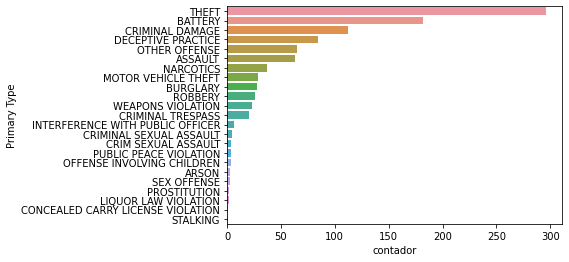

In [8]:
#Ver la estadistica general del dataframe
print("Estadisticas generales del dataframe: ",df2.shape)
print("-------------------------------------------------------------")

#Dejar las columnas PrimaryType, y Date.
del df2["Unnamed: 0"]
print(df2)
print("-------------------------------------------------------------")

#Transformar la columna Date que es tipo string en una tipo Fecha
df2.Date =pd.to_datetime(df2.Date,format="%m/%d/%Y %I:%M:%S %p")
print(df2.Date)
print("-------------------------------------------------------------")

#Mostrar los casos totales para cada tipo de crimen de forma ascendente
print("Datos organizados de forma ascendente para el numero de crimenes \n")
print(df2.groupby("Primary Type").Date.count().sort_values())                 #Datos organizados de forma ascendente para el numero de crimenes
print("\nDatos organizados de forma alfabetica \n")
print(df2.sort_values(by=['Primary Type']))                                   #Datos organizados de forma alfabetica 
print("-------------------------------------------------------------")

#Mostrar de la fila 100 a la 120
print(df2.iloc[100:121])
print("-------------------------------------------------------------")

#Realizar una visualización de los datos anteriores.Emplee la libreria seaborn con un grafico tipo barplot
datos = df2.groupby("Primary Type").Date.count().sort_values(ascending=False)
datos = datos.reset_index()
datos = datos.rename(columns={"Date":"contador"})
ax = sns.barplot(x = "contador", y="Primary Type", data = datos)

#Solución Punto 3


In [6]:
path="https://docs.google.com/spreadsheets/d/e/2PACX-1vSfBl3kii5eJ2mhYt_jW-cSwiJwdNDgTXZcgiN_XeTd4e7b2MomSjJDwjpRliJ0yMkl8w31b0M4vsOS/pub?output=csv"
df3= pd.read_csv(path, index_col="country")
df3

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,2021-04-03,132915.0,111588.0,21327.0,8162.0,8498.0,0.89,0.75,0.14,572.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1379872908...
Zimbabwe,ZWE,2021-04-04,138900.0,117297.0,21603.0,5985.0,8537.0,0.93,0.79,0.15,574.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1379872908...
Zimbabwe,ZWE,2021-04-05,145510.0,123454.0,22056.0,6610.0,9129.0,0.98,0.83,0.15,614.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1379872908...


In [7]:
#Se mandan los datos de colombia a un CSV
datos_Colombia = df3.loc["Colombia"]
datos_Colombia.to_csv("Datos_Colombia")

#Comparacion con los paises latinoamericanos:
paises_latinoamerica= ["Argentina","Bolivia","Chile","Colombia","Costa Rica","Ecuador","El Salvador","Guatemala","Honduras","Mexico","Panama","Paraguay","Peru","Dominican Republic","Uruguay","Venezuela"]
datos_importantes = df3[["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"]]


lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
lista8=[]
lista9=[]

#Tratamiento de los tipos de datos de la tabla
for t in paises_latinoamerica:
  df = datos_importantes.loc[t]
  num = df["total_vaccinations"].max()
  lista1.append(num)
for t in paises_latinoamerica:
  df = datos_importantes.loc[t]
  num = df["people_vaccinated"].max()
  lista2.append(num)
for t in paises_latinoamerica:
  df = datos_importantes.loc[t]
  num = df["people_fully_vaccinated"].max()
  lista3.append(num)
for t in paises_latinoamerica:
  df = datos_importantes.loc[t]
  num = df["daily_vaccinations_raw"].mean()
  lista4.append(num)
for t in paises_latinoamerica:
  df = datos_importantes.loc[t]
  num = df["daily_vaccinations"].mean()
  lista5.append(num)
for t in paises_latinoamerica:
  df = datos_importantes.loc[t]
  num = df["total_vaccinations_per_hundred"].mean()
  lista6.append(num)
for t in paises_latinoamerica:
  df = datos_importantes.loc[t]
  num = df["people_vaccinated_per_hundred"].mean()
  lista7.append(num)
for t in paises_latinoamerica:
  df = datos_importantes.loc[t]
  num = df["people_fully_vaccinated_per_hundred"].mean()
  lista8.append(num)
for t in paises_latinoamerica:
  df = datos_importantes.loc[t]
  num = df["daily_vaccinations_per_million"].mean()
  lista9.append(num)

#Se crea de un DataFrame con los resultados obtenidos de toda Latinoamerica, para poder comparar los resultados entre ellos mismos
dic=[]
dataf=[]

for i in range(0,16,1):
  dic={
          "total_vaccinations":lista1[i],
          "people_vaccinated":lista2[i],
          "people_fully_vaccinated":lista3[i],
          "daily_vaccinations_raw":lista4[i],
          "daily_vaccinations":lista5[i],
          "total_vaccinations_per_hundred":lista6[i],
          "people_vaccinated_per_hundred":lista7[i],
          "people_fully_vaccinated_per_hundred":lista8[i],
          "daily_vaccinations_per_million":lista9[i]
          }
  dataf.append(dic)

dataff = pd.DataFrame(dataf)
dataff.index=paises_latinoamerica
print(dataff)

#Determinar el numero de vacunados en el intervalo [1.5E6, 2.0E6]

dataffintervalo1 = dataff[dataff["total_vaccinations"]>=(1.5*10**6)]
dataffintervalo2 = dataffintervalo1[dataffintervalo1["total_vaccinations"]<=(2*10**6)]
print("Los pais/paises con el numero de vacunados en el intervalo [1.5E6, 2.0E6] es/son:")
print(dataffintervalo2)


                    total_vaccinations  ...  daily_vaccinations_per_million
Argentina                    4771214.0  ...                      973.680000
Bolivia                       378455.0  ...                      418.768116
Chile                       11396072.0  ...                     5534.826923
Colombia                     2691513.0  ...                      996.816327
Costa Rica                    504930.0  ...                      877.417476
Ecuador                       356783.0  ...                      230.786667
El Salvador                   160000.0  ...                      461.285714
Guatemala                     127945.0  ...                      164.268293
Honduras                       52772.0  ...                      144.588235
Mexico                      10642873.0  ...                      700.438095
Panama                        456929.0  ...                     1198.949367
Paraguay                       48684.0  ...                      148.377778
Peru        